In [121]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
plt.rcParams["figure.figsize"] = (20,5)

In [2]:
test_df = pd.read_csv("test.csv")

In [3]:
train_df = pd.read_csv("train.csv")

In [4]:
train_df.shape, test_df.shape

((891, 12), (418, 11))

In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
train_df.isna()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [7]:
train_df.isna().sum() 

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:ylabel='Frequency'>

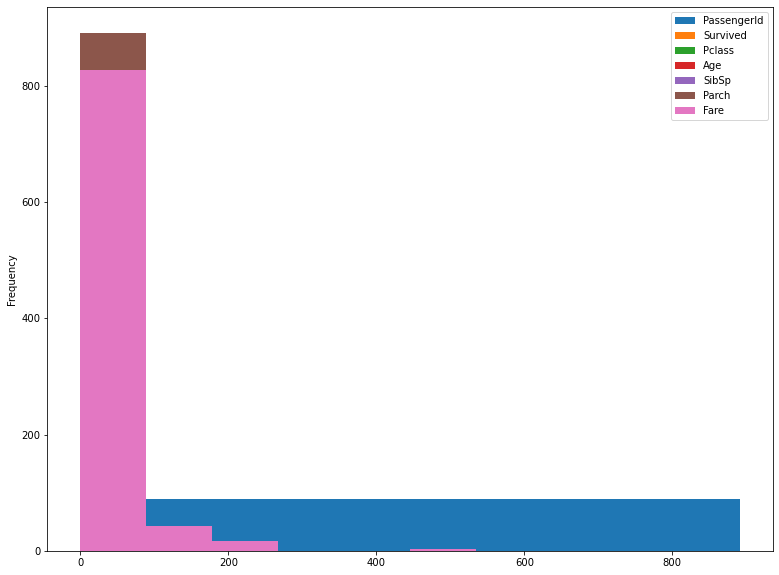

In [8]:
train_df.plot.hist(figsize=(13,10))

array([[<AxesSubplot:title={'center':'PassengerId'}>,
        <AxesSubplot:title={'center':'Survived'}>,
        <AxesSubplot:title={'center':'Pclass'}>],
       [<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'SibSp'}>,
        <AxesSubplot:title={'center':'Parch'}>],
       [<AxesSubplot:title={'center':'Fare'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

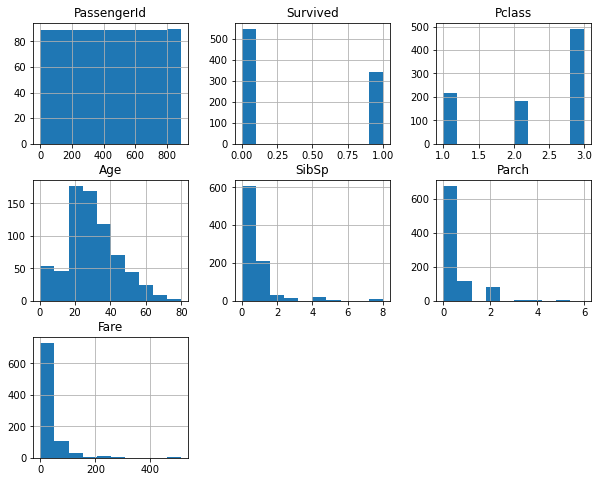

In [9]:
train_df.hist(figsize=(10,8))

array([[<AxesSubplot:title={'center':'PassengerId'}>,
        <AxesSubplot:title={'center':'Pclass'}>],
       [<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'SibSp'}>],
       [<AxesSubplot:title={'center':'Parch'}>,
        <AxesSubplot:title={'center':'Fare'}>]], dtype=object)

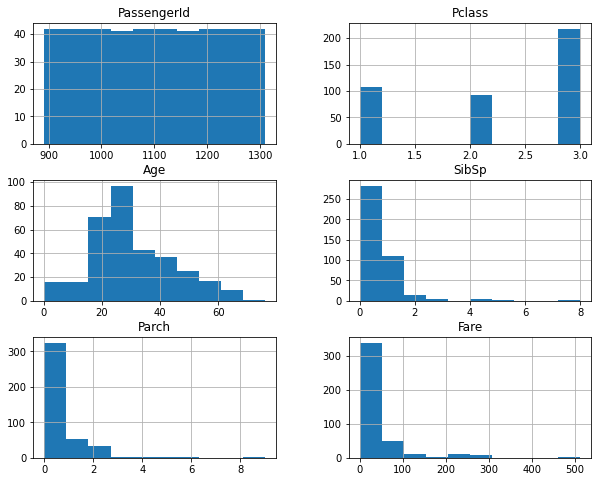

In [10]:
test_df.hist(figsize=(10,8))

In [12]:
import seaborn as sns

<AxesSubplot:xlabel='Survived', ylabel='count'>

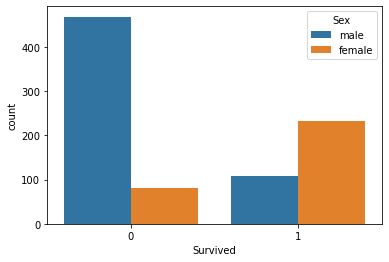

In [13]:
sns.countplot(x="Survived", hue="Sex", data=train_df)

<AxesSubplot:xlabel='Survived', ylabel='count'>

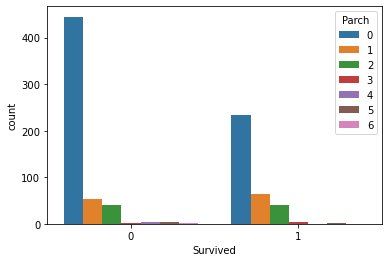

In [14]:
sns.countplot(x="Survived", hue="Parch", data=train_df)

<AxesSubplot:xlabel='Survived', ylabel='count'>

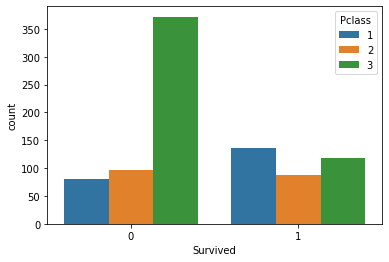

In [15]:
sns.countplot(x="Survived", hue="Pclass", data=train_df)

<AxesSubplot:xlabel='Survived', ylabel='count'>

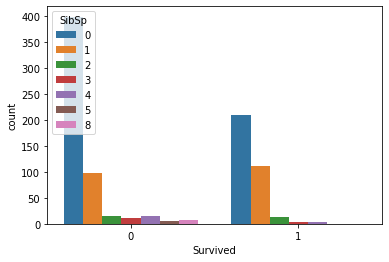

In [18]:
sns.countplot(x="Survived", hue="SibSp", data=train_df)

<AxesSubplot:xlabel='Survived', ylabel='count'>

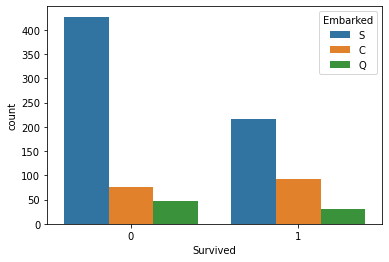

In [19]:
sns.countplot(x="Survived", hue="Embarked", data=train_df)

<AxesSubplot:xlabel='Survived', ylabel='count'>

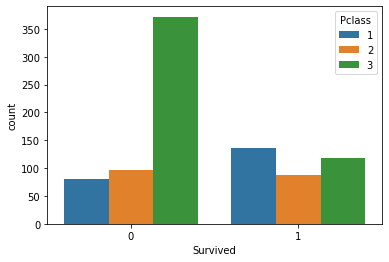

In [20]:
sns.countplot(x="Survived", hue="Pclass", data=train_df)

In [21]:
train_df['Name'].head(7)

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
5                                     Moran, Mr. James
6                              McCarthy, Mr. Timothy J
Name: Name, dtype: object

In [22]:
train_df['Name'].str.extract('(\w+)\.')

,0
0,Mr
1,Mrs
2,Miss
3,Mrs
4,Mr
...,...
886,Rev
887,Miss
888,Miss
889,Mr


In [23]:
data = [train_df, test_df]

In [24]:
train_df['Title'] = train_df['Name'].str.extract('(\w+)\.') 

In [25]:
train_df['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Major         2
Mlle          2
Col           2
Jonkheer      1
Don           1
Countess      1
Lady          1
Ms            1
Capt          1
Mme           1
Sir           1
Name: Title, dtype: int64

In [26]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,Rev
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Miss
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,Miss
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,Mr


In [27]:
test_df['Name'].head(7)

0                                Kelly, Mr. James
1                Wilkes, Mrs. James (Ellen Needs)
2                       Myles, Mr. Thomas Francis
3                                Wirz, Mr. Albert
4    Hirvonen, Mrs. Alexander (Helga E Lindqvist)
5                      Svensson, Mr. Johan Cervin
6                            Connolly, Miss. Kate
Name: Name, dtype: object

In [28]:
test_df['Name'].str.extract('(\w+)\.')

,0
0,Mr
1,Mrs
2,Mr
3,Mr
4,Mrs
...,...
413,Mr
414,Dona
415,Mr
416,Mr


In [29]:
test_df['Title'] = test_df['Name'].str.extract('(\w+)\.')

In [30]:
test_df['Title'].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Rev         2
Col         2
Dona        1
Ms          1
Dr          1
Name: Title, dtype: int64

In [31]:
test_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,Mr
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,Mrs
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,Mr
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,Mr
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,Mrs
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,Mr
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,Dona
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,Mr
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,Mr


In [33]:
test_df['Title'].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Rev         2
Col         2
Dona        1
Ms          1
Dr          1
Name: Title, dtype: int64

In [34]:
train_df['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Major         2
Mlle          2
Col           2
Jonkheer      1
Don           1
Countess      1
Lady          1
Ms            1
Capt          1
Mme           1
Sir           1
Name: Title, dtype: int64

In [35]:
train_df.replace(['Lady', 'Countess','Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare', inplace=True)

In [36]:
test_df.replace(['Lady', 'Countess','Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare', inplace=True)

In [37]:
train_df.replace(['Mlle'], 'Miss', inplace = True)
train_df.replace(['Mme'], 'Mrs', inplace = True)
train_df.replace(['Ms'], 'Miss', inplace = True)


In [38]:
pd.crosstab(train_df['Title'], train_df['Sex'])

Sex,female,male
Title,,
Master,0,40
Miss,185,0
Mr,0,517
Mrs,126,0
Rare,3,20


In [39]:
ohe_title = pd.get_dummies(train_df['Title']) 

In [40]:
train_df = pd.concat([train_df, ohe_title], axis=1, join = "inner") 

In [41]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Master,Miss,Mr,Mrs,Rare
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,0,0,1,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,0,0,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,0,1,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,0,0,0,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,Rare,0,0,0,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Miss,0,1,0,0,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,Miss,0,1,0,0,0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,Mr,0,0,1,0,0


In [42]:
ohe_title = pd.get_dummies(test_df['Title']) 

In [43]:
test_df = pd.concat([test_df, ohe_title], axis=1, join = "inner") 

In [44]:
test_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Master,Miss,Mr,Mrs,Ms,Rare
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,Mr,0,0,1,0,0,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,Mrs,0,0,0,1,0,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,Mr,0,0,1,0,0,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,Mr,0,0,1,0,0,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,Mrs,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,Mr,0,0,1,0,0,0
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,Rare,0,0,0,0,0,1
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,Mr,0,0,1,0,0,0
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,Mr,0,0,1,0,0,0


In [45]:
train_df.drop(['Name', 'PassengerId', 'Title'], inplace = True, axis = 1) 

In [46]:
train_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Master,Miss,Mr,Mrs,Rare
0,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,1,0,0
1,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,0,0,0,1,0
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1,0,0,0
3,1,1,female,35.0,1,0,113803,53.1000,C123,S,0,0,0,1,0
4,0,3,male,35.0,0,0,373450,8.0500,NaN,S,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,211536,13.0000,NaN,S,0,0,0,0,1
887,1,1,female,19.0,0,0,112053,30.0000,B42,S,0,1,0,0,0
888,0,3,female,NaN,1,2,W./C. 6607,23.4500,NaN,S,0,1,0,0,0
889,1,1,male,26.0,0,0,111369,30.0000,C148,C,0,0,1,0,0


In [47]:
test_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Master,Miss,Mr,Mrs,Ms,Rare
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,Mr,0,0,1,0,0,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,Mrs,0,0,0,1,0,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,Mr,0,0,1,0,0,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,Mr,0,0,1,0,0,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,Mrs,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,Mr,0,0,1,0,0,0
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,Rare,0,0,0,0,0,1
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,Mr,0,0,1,0,0,0
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,Mr,0,0,1,0,0,0


In [48]:
train_df= train_df.iloc[:,:-5] 

In [49]:
test_df.drop(['Name', 'PassengerId', 'Title'], inplace = True, axis = 1) 

In [50]:
test_df

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Master,Miss,Mr,Mrs,Ms,Rare
0,3,male,34.5,0,0,330911,7.8292,NaN,Q,0,0,1,0,0,0
1,3,female,47.0,1,0,363272,7.0000,NaN,S,0,0,0,1,0,0
2,2,male,62.0,0,0,240276,9.6875,NaN,Q,0,0,1,0,0,0
3,3,male,27.0,0,0,315154,8.6625,NaN,S,0,0,1,0,0,0
4,3,female,22.0,1,1,3101298,12.2875,NaN,S,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,3,male,NaN,0,0,A.5. 3236,8.0500,NaN,S,0,0,1,0,0,0
414,1,female,39.0,0,0,PC 17758,108.9000,C105,C,0,0,0,0,0,1
415,3,male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,0,0,1,0,0,0
416,3,male,NaN,0,0,359309,8.0500,NaN,S,0,0,1,0,0,0


In [51]:
train_df.drop(['Ticket', 'Cabin'], inplace = True, axis = 1)   

In [52]:
train_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [53]:
test_df.drop(['Ticket', 'Cabin'], inplace = True, axis = 1)   

In [54]:
train_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [55]:
test_df

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Master,Miss,Mr,Mrs,Ms,Rare
0,3,male,34.5,0,0,7.8292,Q,0,0,1,0,0,0
1,3,female,47.0,1,0,7.0000,S,0,0,0,1,0,0
2,2,male,62.0,0,0,9.6875,Q,0,0,1,0,0,0
3,3,male,27.0,0,0,8.6625,S,0,0,1,0,0,0
4,3,female,22.0,1,1,12.2875,S,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,3,male,NaN,0,0,8.0500,S,0,0,1,0,0,0
414,1,female,39.0,0,0,108.9000,C,0,0,0,0,0,1
415,3,male,38.5,0,0,7.2500,S,0,0,1,0,0,0
416,3,male,NaN,0,0,8.0500,S,0,0,1,0,0,0


In [56]:
test_df.loc[test_df['Ms']==1 ,'Miss'] = 1

In [57]:
test_df = test_df.drop('Ms', 1)

In [58]:
train_df['NewAF'] = train_df['Age'] *5 

In [59]:
train_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,NewAF
0,0,3,male,22.0,1,0,7.2500,S,110.0
1,1,1,female,38.0,1,0,71.2833,C,190.0
2,1,3,female,26.0,0,0,7.9250,S,130.0
3,1,1,female,35.0,1,0,53.1000,S,175.0
4,0,3,male,35.0,0,0,8.0500,S,175.0
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,135.0
887,1,1,female,19.0,0,0,30.0000,S,95.0
888,0,3,female,NaN,1,2,23.4500,S,NaN
889,1,1,male,26.0,0,0,30.0000,C,130.0


In [60]:
train_df['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [61]:
train_df['FamSize'] = train_df['SibSp'] + train_df['Parch'] + 1

In [62]:
train_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,NewAF,FamSize
0,0,3,male,22.0,1,0,7.2500,S,110.0,2
1,1,1,female,38.0,1,0,71.2833,C,190.0,2
2,1,3,female,26.0,0,0,7.9250,S,130.0,1
3,1,1,female,35.0,1,0,53.1000,S,175.0,2
4,0,3,male,35.0,0,0,8.0500,S,175.0,1
...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,135.0,1
887,1,1,female,19.0,0,0,30.0000,S,95.0,1
888,0,3,female,NaN,1,2,23.4500,S,NaN,4
889,1,1,male,26.0,0,0,30.0000,C,130.0,1


In [63]:

test_df['FamSize'] = test_df['SibSp'] + test_df['Parch'] + 1

In [64]:
test_df

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Master,Miss,Mr,Mrs,Rare,FamSize
0,3,male,34.5,0,0,7.8292,Q,0,0,1,0,0,1
1,3,female,47.0,1,0,7.0000,S,0,0,0,1,0,2
2,2,male,62.0,0,0,9.6875,Q,0,0,1,0,0,1
3,3,male,27.0,0,0,8.6625,S,0,0,1,0,0,1
4,3,female,22.0,1,1,12.2875,S,0,0,0,1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,3,male,NaN,0,0,8.0500,S,0,0,1,0,0,1
414,1,female,39.0,0,0,108.9000,C,0,0,0,0,1,1
415,3,male,38.5,0,0,7.2500,S,0,0,1,0,0,1
416,3,male,NaN,0,0,8.0500,S,0,0,1,0,0,1


In [65]:
train_df['Sex'].replace(['male', 'female'], [0, 1], inplace = True) 

In [66]:
train_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,NewAF,FamSize
0,0,3,0,22.0,1,0,7.2500,S,110.0,2
1,1,1,1,38.0,1,0,71.2833,C,190.0,2
2,1,3,1,26.0,0,0,7.9250,S,130.0,1
3,1,1,1,35.0,1,0,53.1000,S,175.0,2
4,0,3,0,35.0,0,0,8.0500,S,175.0,1
...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,27.0,0,0,13.0000,S,135.0,1
887,1,1,1,19.0,0,0,30.0000,S,95.0,1
888,0,3,1,NaN,1,2,23.4500,S,NaN,4
889,1,1,0,26.0,0,0,30.0000,C,130.0,1


In [67]:
test_df['Sex'].replace(['male', 'female'], [0, 1], inplace = True,)

In [68]:
test_df

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Master,Miss,Mr,Mrs,Rare,FamSize
0,3,0,34.5,0,0,7.8292,Q,0,0,1,0,0,1
1,3,1,47.0,1,0,7.0000,S,0,0,0,1,0,2
2,2,0,62.0,0,0,9.6875,Q,0,0,1,0,0,1
3,3,0,27.0,0,0,8.6625,S,0,0,1,0,0,1
4,3,1,22.0,1,1,12.2875,S,0,0,0,1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,3,0,NaN,0,0,8.0500,S,0,0,1,0,0,1
414,1,1,39.0,0,0,108.9000,C,0,0,0,0,1,1
415,3,0,38.5,0,0,7.2500,S,0,0,1,0,0,1
416,3,0,NaN,0,0,8.0500,S,0,0,1,0,0,1


In [71]:
train_df[train_df['Embarked'].isna()]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,NewAF,FamSize
61,1,1,1,38.0,0,0,80.0,NaN,190.0,1
829,1,1,1,62.0,0,0,80.0,NaN,310.0,1


In [72]:
train_df['Embarked'].fillna(train_df['Embarked'].mode()[0], inplace=True)

In [73]:
ohe_embarked = pd.get_dummies(train_df['Embarked'])

In [74]:
train_df = pd.concat([train_df, ohe_embarked], axis = 1, join = 'inner')

In [75]:
train_df 

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,NewAF,FamSize,C,Q,S
0,0,3,0,22.0,1,0,7.2500,S,110.0,2,0,0,1
1,1,1,1,38.0,1,0,71.2833,C,190.0,2,1,0,0
2,1,3,1,26.0,0,0,7.9250,S,130.0,1,0,0,1
3,1,1,1,35.0,1,0,53.1000,S,175.0,2,0,0,1
4,0,3,0,35.0,0,0,8.0500,S,175.0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,27.0,0,0,13.0000,S,135.0,1,0,0,1
887,1,1,1,19.0,0,0,30.0000,S,95.0,1,0,0,1
888,0,3,1,NaN,1,2,23.4500,S,NaN,4,0,0,1
889,1,1,0,26.0,0,0,30.0000,C,130.0,1,1,0,0


In [76]:
train_df.drop(['Embarked'], inplace = True, axis =1)

In [77]:
train_df 

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,NewAF,FamSize,C,Q,S
0,0,3,0,22.0,1,0,7.2500,110.0,2,0,0,1
1,1,1,1,38.0,1,0,71.2833,190.0,2,1,0,0
2,1,3,1,26.0,0,0,7.9250,130.0,1,0,0,1
3,1,1,1,35.0,1,0,53.1000,175.0,2,0,0,1
4,0,3,0,35.0,0,0,8.0500,175.0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,27.0,0,0,13.0000,135.0,1,0,0,1
887,1,1,1,19.0,0,0,30.0000,95.0,1,0,0,1
888,0,3,1,NaN,1,2,23.4500,NaN,4,0,0,1
889,1,1,0,26.0,0,0,30.0000,130.0,1,1,0,0


In [78]:
train_df[train_df['Age'].isna()]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,NewAF,FamSize,C,Q,S
5,0,3,0,NaN,0,0,8.4583,NaN,1,0,1,0
17,1,2,0,NaN,0,0,13.0000,NaN,1,0,0,1
19,1,3,1,NaN,0,0,7.2250,NaN,1,1,0,0
26,0,3,0,NaN,0,0,7.2250,NaN,1,1,0,0
28,1,3,1,NaN,0,0,7.8792,NaN,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
859,0,3,0,NaN,0,0,7.2292,NaN,1,1,0,0
863,0,3,1,NaN,8,2,69.5500,NaN,11,0,0,1
868,0,3,0,NaN,0,0,9.5000,NaN,1,0,0,1
878,0,3,0,NaN,0,0,7.8958,NaN,1,0,0,1


In [79]:
test_df[test_df['Embarked'].isna()].count()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
Master      0
Miss        0
Mr          0
Mrs         0
Rare        0
FamSize     0
dtype: int64

In [80]:
ohe_embarked = pd.get_dummies(test_df['Embarked'])

In [81]:
test_df = pd.concat([train_df, ohe_embarked], axis = 1, join = 'inner')

In [82]:
test_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,NewAF,FamSize,C,Q,S,C,Q,S
0,0,3,0,22.0,1,0,7.2500,110.0,2,0,0,1,0,1,0
1,1,1,1,38.0,1,0,71.2833,190.0,2,1,0,0,0,0,1
2,1,3,1,26.0,0,0,7.9250,130.0,1,0,0,1,0,1,0
3,1,1,1,35.0,1,0,53.1000,175.0,2,0,0,1,0,0,1
4,0,3,0,35.0,0,0,8.0500,175.0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,0,2,0,NaN,0,0,0.0000,NaN,1,0,0,1,0,0,1
414,1,3,0,44.0,0,0,7.9250,220.0,1,0,0,1,1,0,0
415,0,3,1,NaN,0,0,8.0500,NaN,1,0,0,1,0,0,1
416,1,2,1,34.0,1,1,32.5000,170.0,3,0,0,1,0,0,1


In [83]:
train_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,NewAF,FamSize,C,Q,S
0,0,3,0,22.0,1,0,7.2500,110.0,2,0,0,1
1,1,1,1,38.0,1,0,71.2833,190.0,2,1,0,0
2,1,3,1,26.0,0,0,7.9250,130.0,1,0,0,1
3,1,1,1,35.0,1,0,53.1000,175.0,2,0,0,1
4,0,3,0,35.0,0,0,8.0500,175.0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,27.0,0,0,13.0000,135.0,1,0,0,1
887,1,1,1,19.0,0,0,30.0000,95.0,1,0,0,1
888,0,3,1,NaN,1,2,23.4500,NaN,4,0,0,1
889,1,1,0,26.0,0,0,30.0000,130.0,1,1,0,0


In [86]:
train_df['Pclass'].unique() 

array([3, 1, 2])

In [87]:
median_ages = pd.DataFrame(columns = train_df['Pclass'].unique()) 

In [88]:
median_ages.loc[0] = [0,0,0] 

In [89]:
median_ages
 

,3,1,2
0,0,0,0


In [90]:
data=[train_df, test_df]

In [91]:
train_df[(train_df['Sex'] == 0) & (train_df['Pclass'] == 1)]['Age'] 

6      54.0
23     28.0
27     19.0
30     40.0
34     28.0
       ... 
839     NaN
857    51.0
867    31.0
872    33.0
889    26.0
Name: Age, Length: 122, dtype: float64

In [92]:
train_df[(train_df['Sex'] == 0) & (train_df['Pclass'] == 1)] 

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,NewAF,FamSize,C,Q,S
6,0,1,0,54.0,0,0,51.8625,270.0,1,0,0,1
23,1,1,0,28.0,0,0,35.5000,140.0,1,0,0,1
27,0,1,0,19.0,3,2,263.0000,95.0,6,0,0,1
30,0,1,0,40.0,0,0,27.7208,200.0,1,1,0,0
34,0,1,0,28.0,1,0,82.1708,140.0,2,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
839,1,1,0,NaN,0,0,29.7000,NaN,1,1,0,0
857,1,1,0,51.0,0,0,26.5500,255.0,1,0,0,1
867,0,1,0,31.0,0,0,50.4958,155.0,1,0,0,1
872,0,1,0,33.0,0,0,5.0000,165.0,1,0,0,1


In [94]:
for s in range(0,2):
    for c in range(1,4):
        median = train_df[(train_df['Sex'] == s) & (train_df['Pclass'] == c)]['Age'].median() 
        median_ages.at[s,c] = median

In [95]:
median_ages

,3,1,2
0,25,40,30
1,21.5,35,28


In [96]:
train_df.loc[:,['Pclass', 'Sex', 'Age']].groupby(['Sex', 'Pclass'], 0).median() 

Age
Sex Pclass      
0   1       40.0
    2       30.0
    3       25.0
1   1       35.0
    2       28.0
    3       21.5

In [99]:
train_df.loc[(train_df['Sex'] == 1) & (train_df['Pclass'] == 1) & (train_df['Age'].isna()), 'Age']

31    NaN
166   NaN
256   NaN
306   NaN
334   NaN
375   NaN
457   NaN
669   NaN
849   NaN
Name: Age, dtype: float64

In [100]:
for s in range(0,2):
    for c in range(1,4):
        train_df.loc[(train_df['Sex'] == s) & (train_df['Pclass'] == c) & (train_df['Age'].isna()), 'Age'] = median_ages.at[s,c] 
        and 1 for sex and class
    


In [101]:
train_df[train_df['Age'].isna()]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,NewAF,FamSize,C,Q,S


In [102]:
train_df = train_df.drop('NewAF', axis = 1)

In [103]:
train_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,FamSize,C,Q,S
0,0,3,0,22.0,1,0,7.2500,2,0,0,1
1,1,1,1,38.0,1,0,71.2833,2,1,0,0
2,1,3,1,26.0,0,0,7.9250,1,0,0,1
3,1,1,1,35.0,1,0,53.1000,2,0,0,1
4,0,3,0,35.0,0,0,8.0500,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,27.0,0,0,13.0000,1,0,0,1
887,1,1,1,19.0,0,0,30.0000,1,0,0,1
888,0,3,1,21.5,1,2,23.4500,4,0,0,1
889,1,1,0,26.0,0,0,30.0000,1,1,0,0


In [104]:
test_df = test_df.drop('NewAF', axis = 1)

In [105]:
test_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,FamSize,C,Q,S,C,Q,S
0,0,3,0,22.0,1,0,7.2500,2,0,0,1,0,1,0
1,1,1,1,38.0,1,0,71.2833,2,1,0,0,0,0,1
2,1,3,1,26.0,0,0,7.9250,1,0,0,1,0,1,0
3,1,1,1,35.0,1,0,53.1000,2,0,0,1,0,0,1
4,0,3,0,35.0,0,0,8.0500,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,0,2,0,NaN,0,0,0.0000,1,0,0,1,0,0,1
414,1,3,0,44.0,0,0,7.9250,1,0,0,1,1,0,0
415,0,3,1,NaN,0,0,8.0500,1,0,0,1,0,0,1
416,1,2,1,34.0,1,1,32.5000,3,0,0,1,0,0,1


In [106]:
median_ages = pd.DataFrame(columns = test_df['Pclass'].unique()) 

In [107]:
median_ages.loc[1] = [0,0,0] 

In [108]:
for s in range(0,2):
    for c in range(1,4):
        median = test_df[(test_df['Sex'] == s) & (test_df['Pclass'] == c)]['Age'].median() 
        median_ages.at[s,c] = median

In [109]:
for s in range(0,2):
    for c in range(1,4):
        test_df.loc[(test_df['Sex'] == s) & (test_df['Pclass'] == c) & (test_df['Age'].isna()), 'Age'] = median_ages.at[s,c]

/Users/abirami/opt/miniconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
/Users/abirami/opt/miniconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
/Users/abirami/opt/miniconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index

In [110]:
median_ages

,3,1,2
1,21.5,34,29
0,25,40,30


In [111]:
test_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,FamSize,C,Q,S,C,Q,S
0,0,3,0,22.0,1,0,7.2500,2,0,0,1,0,1,0
1,1,1,1,38.0,1,0,71.2833,2,1,0,0,0,0,1
2,1,3,1,26.0,0,0,7.9250,1,0,0,1,0,1,0
3,1,1,1,35.0,1,0,53.1000,2,0,0,1,0,0,1
4,0,3,0,35.0,0,0,8.0500,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,0,2,0,30.0,0,0,0.0000,1,0,0,1,0,0,1
414,1,3,0,44.0,0,0,7.9250,1,0,0,1,1,0,0
415,0,3,1,21.5,0,0,8.0500,1,0,0,1,0,0,1
416,1,2,1,34.0,1,1,32.5000,3,0,0,1,0,0,1


In [112]:
test_df['Age'].isna().sum()

0

In [113]:
test_df= test_df.iloc[:,:-3] 

In [119]:
test_df

,Pclass,Sex,Age,SibSp,Parch,Fare,FamSize,C,Q,S
0,3,0,22.0,1,0,7.2500,2,0,0,1
1,1,1,38.0,1,0,71.2833,2,1,0,0
2,3,1,26.0,0,0,7.9250,1,0,0,1
3,1,1,35.0,1,0,53.1000,2,0,0,1
4,3,0,35.0,0,0,8.0500,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
413,2,0,30.0,0,0,0.0000,1,0,0,1
414,3,0,44.0,0,0,7.9250,1,0,0,1
415,3,1,21.5,0,0,8.0500,1,0,0,1
416,2,1,34.0,1,1,32.5000,3,0,0,1


In [118]:
train_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,FamSize,C,Q,S
0,0,3,0,22.0,1,0,7.2500,2,0,0,1
1,1,1,1,38.0,1,0,71.2833,2,1,0,0
2,1,3,1,26.0,0,0,7.9250,1,0,0,1
3,1,1,1,35.0,1,0,53.1000,2,0,0,1
4,0,3,0,35.0,0,0,8.0500,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,27.0,0,0,13.0000,1,0,0,1
887,1,1,1,19.0,0,0,30.0000,1,0,0,1
888,0,3,1,21.5,1,2,23.4500,4,0,0,1
889,1,1,0,26.0,0,0,30.0000,1,1,0,0


In [117]:
test_df.drop('Survived', axis = 1, inplace = True)

<AxesSubplot:>

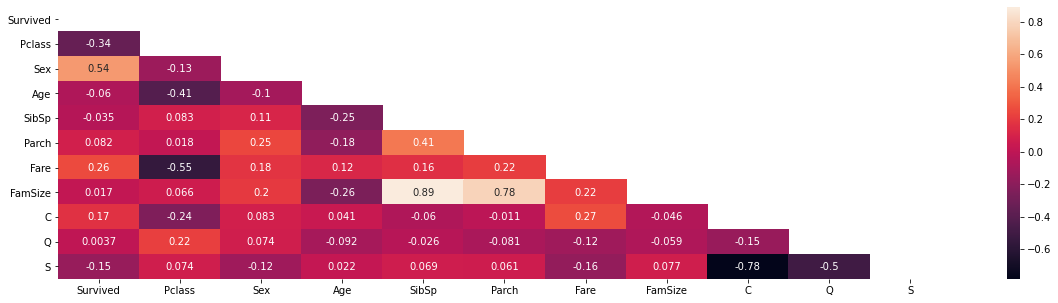

In [122]:
corr = train_df.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, annot=True, mask=mask)

In [153]:
X, Y = train_df.iloc[:,1:].to_numpy(), train_df.iloc[:,0].to_numpy()
X.shape, Y.shape

((891, 10), (891,))

In [154]:
X_val = test_df.to_numpy()

In [155]:
import sklearn

In [159]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier()

In [160]:
from sklearn.model_selection import StratifiedKFold

In [173]:
skf = StratifiedKFold(n_splits=10)
skf.get_n_splits(X, Y)
sgd = SGDClassifier()
for train_index, test_index in skf.split(X, Y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = Y[train_index], Y[test_index]
    sgd.fit(X_train, y_train)
    print(sgd.score(X_test, y_test))

0.6777777777777778
0.6853932584269663
0.449438202247191
0.8314606741573034
0.7752808988764045
0.7303370786516854
0.7865168539325843
0.4044943820224719
0.7865168539325843
0.7640449438202247


In [176]:
from sklearn.ensemble import RandomForestClassifier 

In [177]:
skf = StratifiedKFold(n_splits=10)
skf.get_n_splits(X, Y)
rfc = RandomForestClassifier() 
for train_index, test_index in skf.split(X, Y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = Y[train_index], Y[test_index]
    rfc.fit(X_train, y_train) 
    print(rfc.score(X_test, y_test)) 

0.7333333333333333
0.797752808988764
0.7528089887640449
0.8314606741573034
0.8651685393258427
0.8539325842696629
0.8202247191011236
0.7640449438202247
0.8089887640449438
0.8539325842696629


In [178]:
rfc.feature_importances_ 

array([0.07100974, 0.25620738, 0.25784854, 0.02955842, 0.02332208,
       0.27288437, 0.05303074, 0.01331477, 0.00912775, 0.01369621])

<AxesSubplot:>

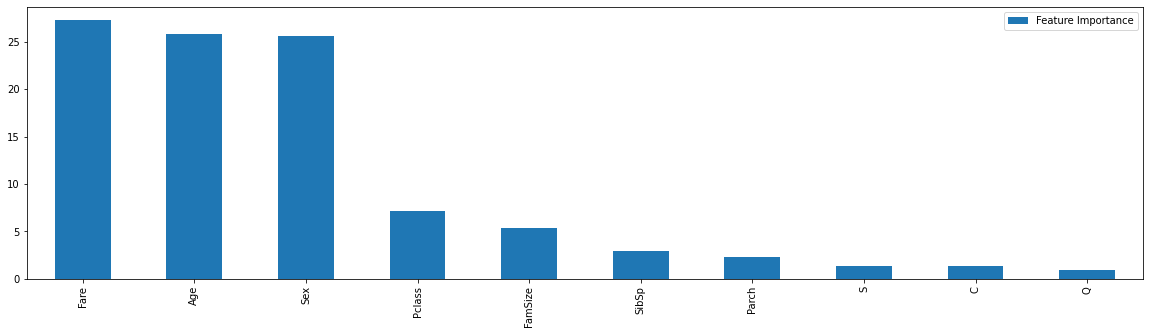

In [192]:
importance = pd.DataFrame(rfc.feature_importances_*100, index=test_df.columns, columns=['Feature Importance']) 
importance = importance.sort_values(['Feature Importance'], ascending=False) 
importance.plot.bar() 

In [193]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [208]:
dtc = DecisionTreeClassifier(criterion="entropy", max_depth=5)

In [209]:
skf = StratifiedKFold(n_splits=10) 
skf.get_n_splits(X, Y)
for train_index, test_index in skf.split(X, Y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = Y[train_index], Y[test_index]
    dtc.fit(X_train, y_train) 
    print(dtc.score(X_test, y_test))

0.7444444444444445
0.8089887640449438
0.7415730337078652
0.8539325842696629
0.8539325842696629
0.797752808988764
0.7752808988764045
0.7752808988764045
0.8539325842696629
0.8426966292134831


In [210]:
dtc.feature_importances_

array([0.14848   , 0.4720221 , 0.13893829, 0.01283343, 0.        ,
       0.13054932, 0.08719359, 0.00998327, 0.        , 0.        ])

<AxesSubplot:>

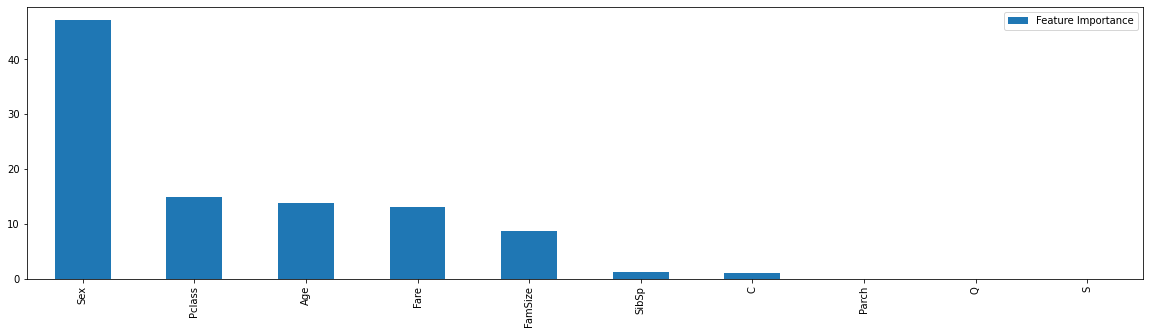

In [211]:
importance = pd.DataFrame(dtc.feature_importances_*100, index=test_df.columns, columns=['Feature Importance']) 
importance = importance.sort_values(['Feature Importance'], ascending=False) 
importance.plot.bar() 

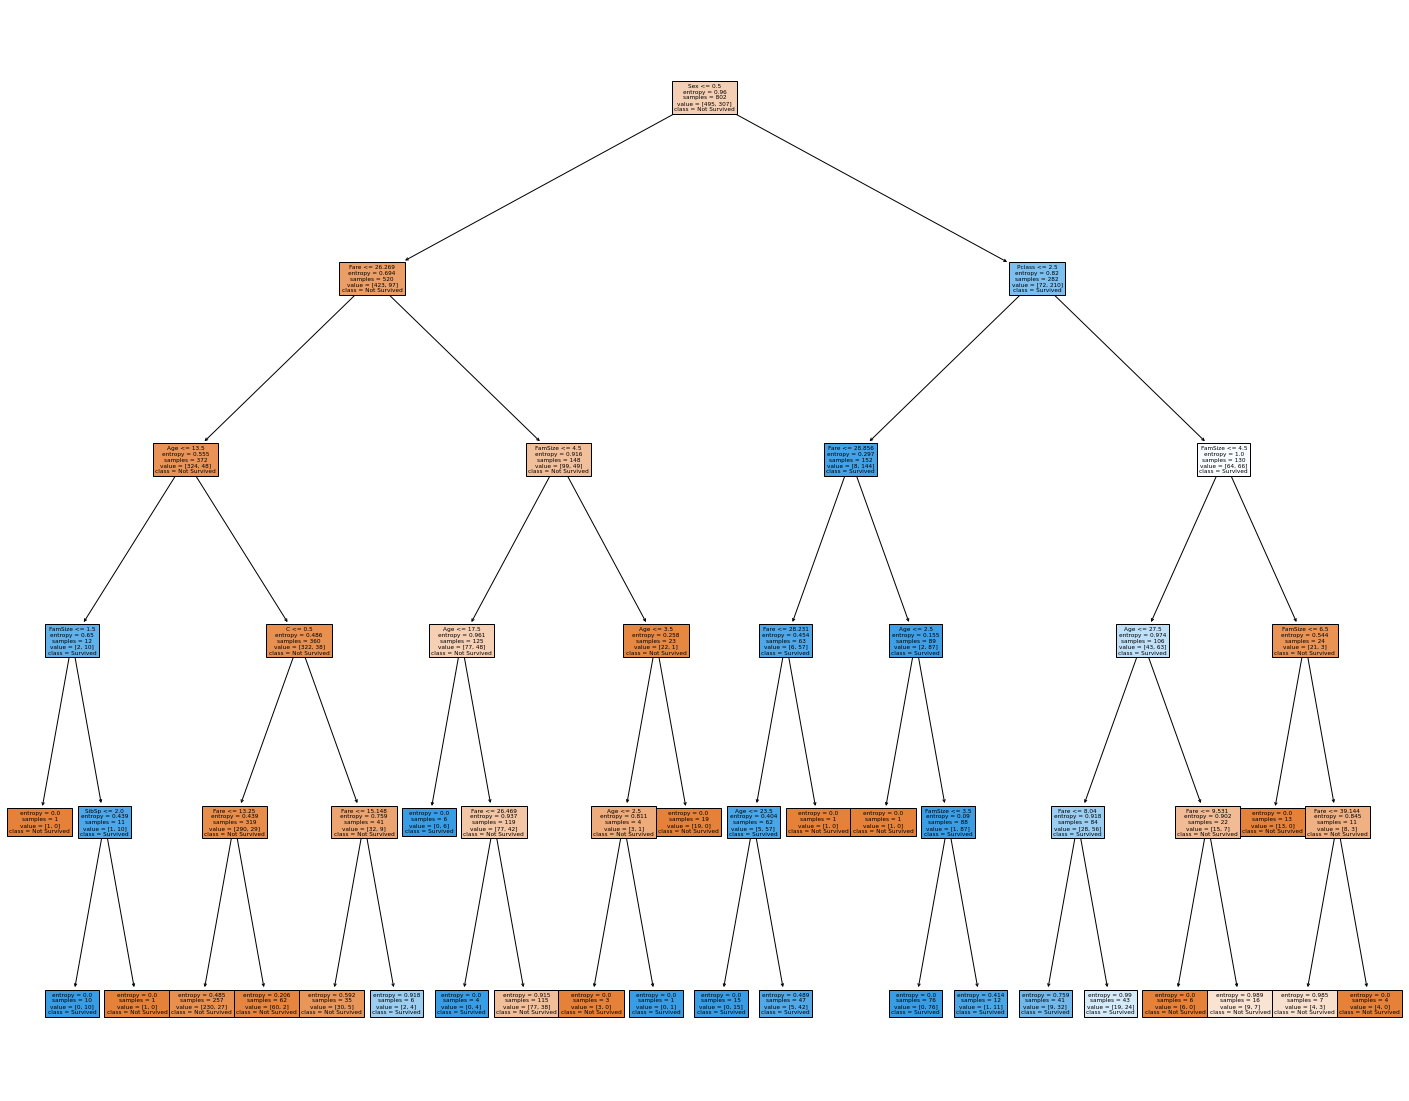

In [213]:
fig = plt.figure(figsize=(25,20))
_ = plot_tree(dtc, filled=True, feature_names=test_df.columns, class_names=["Not Survived", "Survived"])
fig.savefig("tree2.pdf")

In [201]:
plt.savefig("tree2.pdf")

<Figure size 1440x360 with 0 Axes>

In [214]:
from sklearn.svm import SVC

In [215]:
skf = StratifiedKFold(n_splits=10) 
skf.get_n_splits(X, Y)
svc = SVC() 
for train_index, test_index in skf.split(X, Y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = Y[train_index], Y[test_index]
    svc.fit(X_train, y_train) 
    print(svc.score(X_test, y_test))

0.6
0.5842696629213483
0.7078651685393258
0.7528089887640449
0.6853932584269663
0.6966292134831461
0.6966292134831461
0.7191011235955056
0.7191011235955056
0.6629213483146067


In [226]:
node_indicator = dtc.decision_path(X_train[:10])
leaf_id = dtc.apply(X_train[:10])

n_nodes = dtc.tree_.node_count
children_left = dtc.tree_.children_left
children_right = dtc.tree_.children_right
feature = dtc.tree_.feature
threshold = dtc.tree_.threshold

sample_id = 3
node_index = node_indicator.indices[node_indicator.indptr[sample_id]:
                                    node_indicator.indptr[sample_id + 1]]

print('Rules used to predict sample {id}:\n'.format(id=sample_id))
for node_id in node_index:
    if leaf_id[sample_id] == node_id:
        continue

    if (X_test[sample_id, feature[node_id]] <= threshold[node_id]):
        threshold_sign = "<="
    else:
        threshold_sign = ">"

    print("decision node {node} : (X_test[{sample}, {feature}] = {value}) "
          "{inequality} {threshold})".format(
              node=node_id,
              sample=sample_id,
              feature=feature[node_id],
              value=X_test[sample_id, feature[node_id]],
              inequality=threshold_sign,
              threshold=threshold[node_id]))

Rules used to predict sample 3:

decision node 0 : (X_test[3, 1] = 0.0) <= 0.5)
decision node 26 : (X_test[3, 0] = 3.0) > 2.5)
decision node 27 : (X_test[3, 5] = 8.5167) <= 28.856249809265137)
decision node 33 : (X_test[3, 2] = 0.42) <= 2.5)
decision node 35 : (X_test[3, 6] = 2.0) <= 3.5)


In [220]:
list(enumerate(test_df.columns))

[(0, 'Pclass'),
 (1, 'Sex'),
 (2, 'Age'),
 (3, 'SibSp'),
 (4, 'Parch'),
 (5, 'Fare'),
 (6, 'FamSize'),
 (7, 'C'),
 (8, 'Q'),
 (9, 'S')]

In [225]:
y_train[3]

1